In [12]:
import importlib
import Simulation.Rotation_port_sim
import Simulation.Hub_port_sim
importlib.reload(Simulation.Rotation_port_sim)
importlib.reload(Simulation.Hub_port_sim)
from Simulation.Rotation_port_sim import PortNetworkSimulation
from Simulation.Hub_port_sim import HubSpokeSimulation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [1]:
# Shared environment parameters
env_params = {
    "num_ports": 5,
    "days": 100,
    "port_capacity": 100,
    "daily_input": 2,
    "daily_output": 5
}

# Rotation-specific ship settings
rotation_params = {
    "num_ships": 5,
    "ship_capacity": 50,
    "pickup_amount": 20,
    "drop_ratio": 0.8
}

# Hub-and-spoke-specific ship settings
hub_params = {
    "num_small_ships": 5,
    "hub_capacity": 200,
    "ship_capacity_big": 100,
    "ship_capacity_small": 30,
    "pickup_amount": 5,
    "drop_ratio": 0.8
}


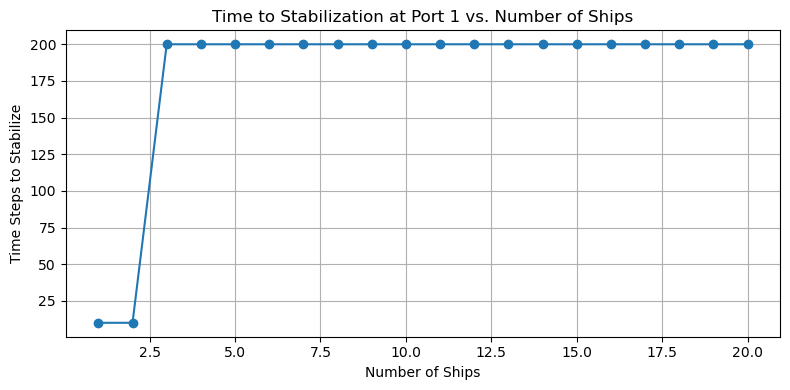

In [6]:
import numpy as np
import matplotlib.pyplot as plt

T = 200
num_ports = 3
W, I, O, U, L = 1000, 10, 10, 20, 20
ship_capacity = 100
ship_counts = range(1, 21)
tolerance = 5  # TEU window around equilibrium
results = []

for num_ships in ship_counts:
    w = np.full((T, num_ports), 0.5 * W)
    c = np.zeros((T, num_ships))
    w_star = 0.5 * W  # expected fixed point

    stabilized_at = None

    for t in range(1, T):
        w[t] = w[t - 1].copy()
        for j in range(num_ships):
            port = (t + j) % num_ports
            cargo = c[t - 1, j]
            warehouse = w[t, port]

            unload = min(U, cargo, W - warehouse)
            load = min(L, warehouse, ship_capacity - cargo)

            c[t, j] = cargo - unload + load
            w[t, port] += I - O + unload - load
            w[t, port] = min(w[t, port], W)

        # Check if port 0 is stable for 10 steps
        if t >= 10 and stabilized_at is None:
            recent = w[t-10:t, 0]
            if np.all(np.abs(recent - w_star) < tolerance):
                stabilized_at = t

    results.append(stabilized_at if stabilized_at is not None else T)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(ship_counts, results, marker='o')
plt.title("Time to Stabilization at Port 1 vs. Number of Ships")
plt.xlabel("Number of Ships")
plt.ylabel("Time Steps to Stabilize")
plt.grid(True)
plt.tight_layout()
plt.show()


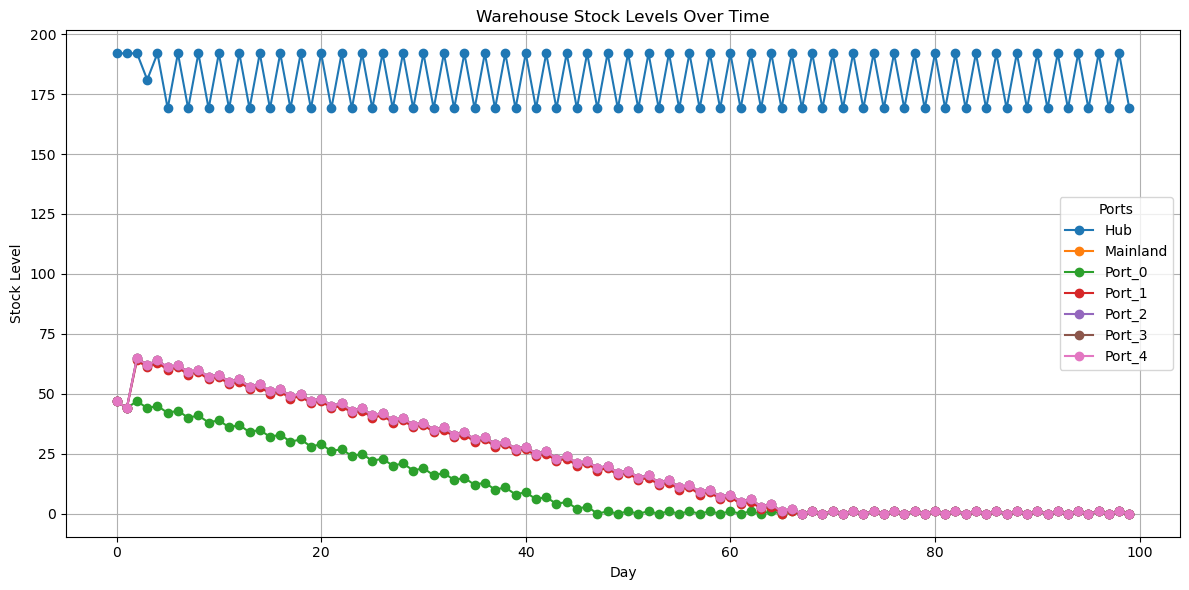

In [15]:
# Run hub-and-spoke simulation
sim_hub = HubSpokeSimulation(
    num_ports=env_params["num_ports"],
    num_small_ships=hub_params["num_small_ships"],
    days=env_params["days"],
    port_capacity=env_params["port_capacity"],
    hub_capacity=hub_params["hub_capacity"],
    ship_capacity_big=hub_params["ship_capacity_big"],
    ship_capacity_small=hub_params["ship_capacity_small"],
    pickup_amount=hub_params["pickup_amount"],
    drop_ratio=hub_params["drop_ratio"],
    daily_input=env_params["daily_input"],
    daily_output=env_params["daily_output"]
)

df_hub = sim_hub.run()
sim_hub.visualize_stock_levels()



In [7]:
# Simulation parameters
num_ports = 4
simulation_time = 100  # total time steps
np.random.seed(42)

# Generate synthetic warehouse levels over time (as an example)
warehouse_levels = []
for port in range(num_ports):
    level = np.zeros(simulation_time)
    level[0] = np.random.uniform(20, 80)  # initial warehouse fill (in %)
    for t in range(1, simulation_time):
        # Simulate some basic dynamics: inflow, outflow, and fluctuation
        inflow = np.random.uniform(0, 5)
        outflow = np.random.uniform(0, 4)
        level[t] = min(100, max(0, level[t-1] + inflow - outflow + np.random.uniform(-1, 1)))
    warehouse_levels.append(level)

# Plotting
time = np.arange(simulation_time)
plt.figure


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>